In [1]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime
from numpy import mean

name="espalda1"

incT=50

series=read_csv(name+".tsv", sep="\t",parse_dates=False)
Y=read_csv(name+".L.tsv", sep="\t",parse_dates=False)

print(series.values)
            
    


[[ 5.20000000e+00 -2.00000000e-01  9.80000000e+00  1.68867978e+12]
 [ 4.60000000e+00 -1.30000000e+00  9.70000000e+00  1.68867978e+12]
 [ 3.20000000e+00 -1.30000000e+00  9.20000000e+00  1.68867978e+12]
 ...
 [ 1.37000000e+01 -4.10000000e+00  1.50000000e+00  1.68868018e+12]
 [ 1.27000000e+01 -3.40000000e+00  6.00000000e-01  1.68868018e+12]
 [ 1.16000000e+01 -4.80000000e+00 -1.00000000e+00  1.68868018e+12]]


In [2]:
TY=np.array(Y["timestamp"])
LY=np.array(Y["label"])

print(TY)
print(LY)


lastT=-1
for i in range(0,len(TY)):
    if(LY[i]==0 or LY[i]==-1):
        TY[i]=TY[i]+lastT
        lastT=TY[i]
    if(LY[i]==1):
        lastT=TY[i]
    if(LY[i]==-1):
        lastT=-1
        
print(TY)
print(LY)


[ 11100   1500   1500   1500   1500   1500   1500   1500   1500   1500
   1500    500  38600   1500   1500   1500   1400   1400   1400   1400
   1400   1500   1500    500  67600   1500   1500   1600   1600   1600
   1600   1600   1600   1600   1600    500 101700   1600   1600   1600
   1600   1600   1600   1600   1600   1600   1600    500 131300   1600
   1600   1500   1500   1400   1400   1600   1600   1600   1600    500
 163700   1600   1600   1500   1500   1700   1700   1700   1700   1600
   1500    500 194300   1600   1600   1500   1500   1600   1600   1600
   1500   1500   1500    500 226000   1600   1600   1500   1500   1600
   1600   1700   1700   1700   1700    500 263500   1600   1500   1500
   1500   1500   1600   1600   1600   1600   1600    500 298500   1600
   1600   1500   1500   1600   1600   1600   1600   1600   1600    500
 332500   1600   1600   1500   1500   1600   1600   1600   1600   1600
   1600    500 369400   1600   1500   1500   1500   1500   1500   1500
   150

In [3]:
T=np.array(series["timestamp"])



t0=T[0]
tY0=TY[0]
tN=T[-1]
print(t0,tN)

tY0=int(tY0/incT)*incT
t0=int(t0/incT)*incT
tN=int(tN/incT)*incT

print(t0,tN, (int)(tN-t0)/1000)

X=[]
Y=[]
Z=[]
L=[]
TT=[]

v0=0
sesion=False
for ti in range(t0,tN,incT):
    print("ti:",ti, ti-t0)
    
    i=np.where( (TY>=ti-t0) & (TY<=ti+incT-t0))
    print("i2:",i[0], "LY:",LY[i[0]])
    
    if(len(i[0])>0):
        l=LY[i[0][0]]
        if(l==1):
            v0=0
            sesion=True
        if(l==-1):
            v0=0
            sesion=False    
        if(l==0):
            v0=0
        
    
    if(sesion):
        v0=v0+0.01
        print("v0:",v0)
        L.append(v0)
    else:
        L.append(0)
        
        
    i=np.where( (T>=ti) & (T<=ti+incT))
    print(i)
    print(series.values[i])
    
    x0=mean(series.values[i][:,0])
    y0=mean(series.values[i][:,1])
    z0=mean(series.values[i][:,2])
            
    if(sesion):
        X.append(x0)
        Y.append(y0)         
        Z.append(z0)
    else:
        X.append(x0)
        Y.append(y0)         
        Z.append(z0)     
    print(x0,y0,z0)    

    
        
    TT.append(ti-t0)
    
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
L=np.array(L)
TT=np.array(TT)



1688679779532 1688680175512
1688679779500 1688680175500 396.0
ti: 1688679779500 0
i2: [] LY: []
(array([0], dtype=int64),)
[[ 5.20000000e+00 -2.00000000e-01  9.80000000e+00  1.68867978e+12]]
5.2 -0.2 9.8
ti: 1688679779550 50
i2: [] LY: []
(array([1, 2, 3], dtype=int64),)
[[ 4.60000000e+00 -1.30000000e+00  9.70000000e+00  1.68867978e+12]
 [ 3.20000000e+00 -1.30000000e+00  9.20000000e+00  1.68867978e+12]
 [ 1.50000000e+00 -1.00000000e-01  9.20000000e+00  1.68867978e+12]]
3.1 -0.9 9.366666666666665
ti: 1688679779600 100
i2: [] LY: []
(array([4, 5], dtype=int64),)
[[1.20000000e+00 5.00000000e-01 8.80000000e+00 1.68867978e+12]
 [1.70000000e+00 6.00000000e-01 9.20000000e+00 1.68867978e+12]]
1.45 0.55 9.0
ti: 1688679779650 150
i2: [] LY: []
(array([6, 7, 8], dtype=int64),)
[[2.30000000e+00 3.00000000e-01 9.30000000e+00 1.68867978e+12]
 [2.60000000e+00 1.00000000e-01 9.30000000e+00 1.68867978e+12]
 [2.30000000e+00 4.00000000e-01 9.00000000e+00 1.68867978e+12]]
2.4 0.26666666666666666 9.2000000

[[ 7.7000000e+00 -7.7000000e+00 -4.5000000e+00  1.6886798e+12]
 [ 7.3000000e+00 -6.3000000e+00 -3.0000000e+00  1.6886798e+12]]
7.5 -7.0 -3.75
ti: 1688679802250 22750
i2: [] LY: []
v0: 0.24000000000000007
(array([1136, 1137, 1138], dtype=int64),)
[[ 6.4000000e+00 -6.4000000e+00 -4.2000000e+00  1.6886798e+12]
 [ 6.1000000e+00 -7.1000000e+00 -4.8000000e+00  1.6886798e+12]
 [ 6.4000000e+00 -7.5000000e+00 -5.6000000e+00  1.6886798e+12]]
6.3 -7.0 -4.866666666666666
ti: 1688679802300 22800
i2: [] LY: []
v0: 0.25000000000000006
(array([1139, 1140], dtype=int64),)
[[ 5.9000000e+00 -6.3000000e+00 -4.8000000e+00  1.6886798e+12]
 [ 4.7000000e+00 -6.2000000e+00 -4.0000000e+00  1.6886798e+12]]
5.300000000000001 -6.25 -4.4
ti: 1688679802350 22850
i2: [] LY: []
v0: 0.26000000000000006
(array([1141, 1142, 1143], dtype=int64),)
[[ 4.4000000e+00 -7.4000000e+00 -5.4000000e+00  1.6886798e+12]
 [ 3.4000000e+00 -7.2000000e+00 -4.5000000e+00  1.6886798e+12]
 [ 2.8000000e+00 -6.7000000e+00 -4.9000000e+00  1.68

[[ 1.10000000e+00 -5.70000000e+00 -2.50000000e+00  1.68867983e+12]
 [ 1.30000000e+00 -4.90000000e+00 -2.10000000e+00  1.68867983e+12]]
1.2000000000000002 -5.300000000000001 -2.3
ti: 1688679828050 48550
i2: [] LY: []
v0: 0.26000000000000006
(array([2426, 2427, 2428], dtype=int64),)
[[ 1.00000000e+00 -5.10000000e+00 -1.90000000e+00  1.68867983e+12]
 [ 9.00000000e-01 -3.80000000e+00 -2.00000000e+00  1.68867983e+12]
 [ 7.00000000e-01 -3.00000000e+00 -1.50000000e+00  1.68867983e+12]]
0.8666666666666666 -3.9666666666666663 -1.8
ti: 1688679828100 48600
i2: [] LY: []
v0: 0.2700000000000001
(array([2429, 2430], dtype=int64),)
[[ 3.00000000e-01 -2.90000000e+00  0.00000000e+00  1.68867983e+12]
 [ 0.00000000e+00 -2.80000000e+00  1.00000000e-01  1.68867983e+12]]
0.15 -2.8499999999999996 0.05
ti: 1688679828150 48650
i2: [19] LY: [0]
v0: 0.01
(array([2431, 2432, 2433], dtype=int64),)
[[ 3.00000000e-01 -2.30000000e+00 -7.00000000e-01  1.68867983e+12]
 [ 6.00000000e-01 -2.60000000e+00 -1.00000000e+00  

(array([3761, 3762, 3763], dtype=int64),)
[[ 2.70000000e+00 -6.80000000e+00 -2.50000000e+00  1.68867985e+12]
 [ 1.60000000e+00 -4.80000000e+00 -2.70000000e+00  1.68867985e+12]
 [ 8.00000000e-01 -4.50000000e+00 -2.10000000e+00  1.68867985e+12]]
1.7000000000000002 -5.366666666666667 -2.4333333333333336
ti: 1688679854800 75300
i2: [] LY: []
v0: 0.3100000000000001
(array([3764, 3765], dtype=int64),)
[[-2.00000000e-01 -5.00000000e+00 -1.50000000e+00  1.68867985e+12]
 [-6.00000000e-01 -3.60000000e+00 -0.00000000e+00  1.68867985e+12]]
-0.4 -4.3 -0.75
ti: 1688679854850 75350
i2: [29] LY: [0]
v0: 0.01
(array([3766, 3767, 3768], dtype=int64),)
[[-1.20000000e+00 -2.50000000e+00 -3.00000000e-01  1.68867985e+12]
 [-7.00000000e-01 -2.40000000e+00 -1.20000000e+00  1.68867985e+12]
 [-5.00000000e-01 -4.00000000e+00 -1.20000000e+00  1.68867985e+12]]
-0.7999999999999999 -2.966666666666667 -0.9
ti: 1688679854900 75400
i2: [29] LY: [0]
v0: 0.01
(array([3769, 3770], dtype=int64),)
[[ 1.00000000e-01 -1.80000

8.6 -5.8999999999999995 -1.7
ti: 1688679880900 101400
i2: [] LY: []
(array([5069, 5070], dtype=int64),)
[[ 8.80000000e+00 -5.90000000e+00 -1.60000000e+00  1.68867988e+12]
 [ 8.90000000e+00 -5.90000000e+00 -1.90000000e+00  1.68867988e+12]]
8.850000000000001 -5.9 -1.75
ti: 1688679880950 101450
i2: [] LY: []
(array([5071, 5072, 5073], dtype=int64),)
[[ 8.80000000e+00 -5.90000000e+00 -2.00000000e+00  1.68867988e+12]
 [ 8.80000000e+00 -5.90000000e+00 -2.00000000e+00  1.68867988e+12]
 [ 8.60000000e+00 -5.90000000e+00 -1.90000000e+00  1.68867988e+12]]
8.733333333333334 -5.900000000000001 -1.9666666666666668
ti: 1688679881000 101500
i2: [] LY: []
(array([5074, 5075], dtype=int64),)
[[ 8.40000000e+00 -6.20000000e+00 -1.80000000e+00  1.68867988e+12]
 [ 8.20000000e+00 -6.10000000e+00 -2.00000000e+00  1.68867988e+12]]
8.3 -6.15 -1.9
ti: 1688679881050 101550
i2: [] LY: []
(array([5076, 5077, 5078], dtype=int64),)
[[ 8.30000000e+00 -5.90000000e+00 -2.30000000e+00  1.68867988e+12]
 [ 8.30000000e+00 -

8.95 -7.85 0.8
ti: 1688679907150 127650
i2: [] LY: []
(array([6381, 6382, 6383], dtype=int64),)
[[ 9.30000000e+00 -6.00000000e+00  2.00000000e-01  1.68867991e+12]
 [ 9.10000000e+00 -5.10000000e+00  1.40000000e+00  1.68867991e+12]
 [ 1.00000000e+01 -5.20000000e+00  1.40000000e+00  1.68867991e+12]]
9.466666666666667 -5.433333333333334 1.0
ti: 1688679907200 127700
i2: [] LY: []
(array([6384, 6385], dtype=int64),)
[[ 1.07000000e+01 -2.70000000e+00  1.10000000e+00  1.68867991e+12]
 [ 1.05000000e+01  2.00000000e-01  8.00000000e-01  1.68867991e+12]]
10.6 -1.25 0.9500000000000001
ti: 1688679907250 127750
i2: [] LY: []
(array([6386, 6387, 6388], dtype=int64),)
[[1.06000000e+01 7.00000000e-01 2.20000000e+00 1.68867991e+12]
 [1.21000000e+01 7.00000000e-01 3.90000000e+00 1.68867991e+12]
 [1.22000000e+01 3.00000000e-01 3.60000000e+00 1.68867991e+12]]
11.633333333333333 0.5666666666666667 3.233333333333333
ti: 1688679907300 127800
i2: [] LY: []
(array([6389, 6390], dtype=int64),)
[[ 1.26000000e+01 -

11.366666666666665 -0.8333333333333334 1.8333333333333333
ti: 1688679933000 153500
i2: [] LY: []
(array([7674, 7675], dtype=int64),)
[[ 1.10000000e+01 -2.20000000e+00  1.30000000e+00  1.68867993e+12]
 [ 1.07000000e+01 -3.60000000e+00  5.00000000e-01  1.68867993e+12]]
10.85 -2.9000000000000004 0.9
ti: 1688679933050 153550
i2: [] LY: []
(array([7676, 7677, 7678], dtype=int64),)
[[ 1.03000000e+01 -4.00000000e+00  0.00000000e+00  1.68867993e+12]
 [ 1.01000000e+01 -3.80000000e+00 -1.00000000e-01  1.68867993e+12]
 [ 9.80000000e+00 -4.00000000e+00  7.00000000e-01  1.68867993e+12]]
10.066666666666666 -3.9333333333333336 0.19999999999999998
ti: 1688679933100 153600
i2: [] LY: []
(array([7679, 7680], dtype=int64),)
[[ 9.60000000e+00 -4.40000000e+00  1.00000000e+00  1.68867993e+12]
 [ 8.80000000e+00 -4.90000000e+00  1.40000000e+00  1.68867993e+12]]
9.2 -4.65 1.2
ti: 1688679933150 153650
i2: [] LY: []
(array([7681, 7682, 7683], dtype=int64),)
[[ 8.00000000e+00 -4.50000000e+00  1.20000000e+00  1.68

(array([8999, 9000], dtype=int64),)
[[ 4.60000000e+00 -6.90000000e+00 -3.20000000e+00  1.68867996e+12]
 [ 5.00000000e+00 -6.20000000e+00 -2.90000000e+00  1.68867996e+12]]
4.8 -6.550000000000001 -3.05
ti: 1688679959550 180050
i2: [] LY: []
v0: 0.060000000000000005
(array([9001, 9002, 9003], dtype=int64),)
[[ 5.60000000e+00 -5.40000000e+00  1.00000000e-01  1.68867996e+12]
 [ 1.24000000e+01 -5.40000000e+00 -1.10000000e+00  1.68867996e+12]
 [ 1.12000000e+01 -4.40000000e+00 -1.00000000e+00  1.68867996e+12]]
9.733333333333333 -5.066666666666667 -0.6666666666666666
ti: 1688679959600 180100
i2: [] LY: []
v0: 0.07
(array([9004, 9005], dtype=int64),)
[[ 1.09000000e+01 -3.50000000e+00  3.00000000e-01  1.68867996e+12]
 [ 1.05000000e+01 -2.20000000e+00  1.00000000e-01  1.68867996e+12]]
10.7 -2.85 0.2
ti: 1688679959650 180150
i2: [] LY: []
v0: 0.08
(array([9006, 9007, 9008], dtype=int64),)
[[ 1.07000000e+01 -3.20000000e+00 -1.40000000e+00  1.68867996e+12]
 [ 1.07000000e+01 -4.30000000e+00  0.0000000

(array([10314, 10315], dtype=int64),)
[[ 6.30000000e+00 -8.50000000e+00 -3.70000000e+00  1.68867999e+12]
 [ 5.10000000e+00 -9.60000000e+00 -2.90000000e+00  1.68867999e+12]]
5.699999999999999 -9.05 -3.3
ti: 1688679985850 206350
i2: [] LY: []
v0: 0.22000000000000006
(array([10316, 10317, 10318], dtype=int64),)
[[ 4.10000000e+00 -9.10000000e+00 -3.30000000e+00  1.68867999e+12]
 [ 4.10000000e+00 -8.90000000e+00 -3.50000000e+00  1.68867999e+12]
 [ 3.80000000e+00 -8.30000000e+00 -3.80000000e+00  1.68867999e+12]]
4.0 -8.766666666666667 -3.533333333333333
ti: 1688679985900 206400
i2: [] LY: []
v0: 0.23000000000000007
(array([10319, 10320], dtype=int64),)
[[ 3.00000000e+00 -8.30000000e+00 -3.20000000e+00  1.68867999e+12]
 [ 3.20000000e+00 -8.40000000e+00 -3.00000000e+00  1.68867999e+12]]
3.1 -8.350000000000001 -3.1
ti: 1688679985950 206450
i2: [] LY: []
v0: 0.24000000000000007
(array([10321, 10322, 10323], dtype=int64),)
[[ 2.30000000e+00 -9.20000000e+00 -3.40000000e+00  1.68867999e+12]
 [ 2.70

8.7 -7.35 -2.7
ti: 1688680010750 231250
i2: [] LY: []
v0: 0.11999999999999998
(array([11561, 11562, 11563], dtype=int64),)
[[ 9.30000000e+00 -8.00000000e+00 -2.00000000e+00  1.68868001e+12]
 [ 9.30000000e+00 -5.70000000e+00 -2.70000000e+00  1.68868001e+12]
 [ 1.05000000e+01 -7.90000000e+00 -2.50000000e+00  1.68868001e+12]]
9.700000000000001 -7.2 -2.4
ti: 1688680010800 231300
i2: [] LY: []
v0: 0.12999999999999998
(array([11564, 11565], dtype=int64),)
[[ 1.17000000e+01 -8.60000000e+00 -1.90000000e+00  1.68868001e+12]
 [ 1.08000000e+01 -6.50000000e+00 -2.10000000e+00  1.68868001e+12]]
11.25 -7.55 -2.0
ti: 1688680010850 231350
i2: [] LY: []
v0: 0.13999999999999999
(array([11566, 11567, 11568], dtype=int64),)
[[ 1.12000000e+01 -5.60000000e+00 -2.60000000e+00  1.68868001e+12]
 [ 1.11000000e+01 -6.40000000e+00 -1.60000000e+00  1.68868001e+12]
 [ 1.19000000e+01 -7.20000000e+00 -7.00000000e-01  1.68868001e+12]]
11.399999999999999 -6.3999999999999995 -1.6333333333333335
ti: 1688680010900 231400


11.55 -2.45 2.5999999999999996
ti: 1688680037850 258350
i2: [] LY: []
(array([12916, 12917, 12918], dtype=int64),)
[[ 1.11000000e+01 -2.70000000e+00  1.80000000e+00  1.68868004e+12]
 [ 1.05000000e+01 -2.40000000e+00  1.10000000e+00  1.68868004e+12]
 [ 1.02000000e+01 -2.40000000e+00  1.30000000e+00  1.68868004e+12]]
10.6 -2.5 1.4000000000000001
ti: 1688680037900 258400
i2: [] LY: []
(array([12919, 12920], dtype=int64),)
[[ 1.06000000e+01 -3.40000000e+00  1.30000000e+00  1.68868004e+12]
 [ 9.90000000e+00 -3.80000000e+00  1.30000000e+00  1.68868004e+12]]
10.25 -3.5999999999999996 1.3
ti: 1688680037950 258450
i2: [] LY: []
(array([12921, 12922, 12923], dtype=int64),)
[[ 9.00000000e+00 -3.70000000e+00  2.20000000e+00  1.68868004e+12]
 [ 8.20000000e+00 -3.20000000e+00  1.80000000e+00  1.68868004e+12]
 [ 7.80000000e+00 -4.10000000e+00  8.00000000e-01  1.68868004e+12]]
8.333333333333334 -3.6666666666666665 1.5999999999999999
ti: 1688680038000 258500
i2: [] LY: []
(array([12924, 12925], dtype=i

9.5 -11.25 -0.9500000000000001
ti: 1688680063950 284450
i2: [] LY: []
(array([14221, 14222, 14223], dtype=int64),)
[[ 1.10000000e+01 -9.80000000e+00  9.00000000e-01  1.68868006e+12]
 [ 1.10000000e+01 -8.00000000e+00  1.90000000e+00  1.68868006e+12]
 [ 1.15000000e+01 -7.80000000e+00  2.90000000e+00  1.68868006e+12]]
11.166666666666666 -8.533333333333333 1.8999999999999997
ti: 1688680064000 284500
i2: [] LY: []
(array([14224, 14225], dtype=int64),)
[[ 1.23000000e+01 -8.00000000e+00  3.10000000e+00  1.68868006e+12]
 [ 1.24000000e+01 -6.80000000e+00  3.90000000e+00  1.68868006e+12]]
12.350000000000001 -7.4 3.5
ti: 1688680064050 284550
i2: [] LY: []
(array([14226, 14227, 14228], dtype=int64),)
[[ 1.31000000e+01 -5.40000000e+00  6.10000000e+00  1.68868006e+12]
 [ 1.47000000e+01 -3.60000000e+00  8.10000000e+00  1.68868006e+12]
 [ 1.48000000e+01 -1.80000000e+00  7.90000000e+00  1.68868006e+12]]
14.199999999999998 -3.6 7.366666666666667
ti: 1688680064100 284600
i2: [] LY: []
(array([14229, 1423

8.25 -7.65 -2.75
ti: 1688680089550 310050
i2: [] LY: []
v0: 0.11999999999999998
(array([15501, 15502, 15503], dtype=int64),)
[[ 9.30000000e+00 -1.01000000e+01  1.00000000e-01  1.68868009e+12]
 [ 9.40000000e+00 -8.40000000e+00 -1.40000000e+00  1.68868009e+12]
 [ 9.70000000e+00 -7.50000000e+00 -2.10000000e+00  1.68868009e+12]]
9.466666666666667 -8.666666666666666 -1.1333333333333333
ti: 1688680089600 310100
i2: [] LY: []
v0: 0.12999999999999998
(array([15504, 15505], dtype=int64),)
[[ 1.09000000e+01 -7.60000000e+00 -1.80000000e+00  1.68868009e+12]
 [ 1.07000000e+01 -7.40000000e+00 -6.00000000e-01  1.68868009e+12]]
10.8 -7.5 -1.2
ti: 1688680089650 310150
i2: [] LY: []
v0: 0.13999999999999999
(array([15506, 15507, 15508], dtype=int64),)
[[ 1.05000000e+01 -7.80000000e+00 -6.00000000e-01  1.68868009e+12]
 [ 1.06000000e+01 -7.10000000e+00 -6.00000000e-01  1.68868009e+12]
 [ 1.06000000e+01 -6.20000000e+00 -1.30000000e+00  1.68868009e+12]]
10.566666666666668 -7.033333333333332 -0.83333333333333

[[ 5.40000000e+00 -7.40000000e+00 -3.40000000e+00  1.68868011e+12]
 [ 6.90000000e+00 -8.80000000e+00 -4.00000000e+00  1.68868011e+12]]
6.15 -8.100000000000001 -3.7
ti: 1688680114050 334550
i2: [] LY: []
v0: 0.09999999999999999
(array([16726, 16727, 16728], dtype=int64),)
[[ 7.00000000e+00 -7.30000000e+00 -4.00000000e+00  1.68868011e+12]
 [ 6.20000000e+00 -7.70000000e+00 -2.80000000e+00  1.68868011e+12]
 [ 6.90000000e+00 -6.90000000e+00 -3.40000000e+00  1.68868011e+12]]
6.7 -7.3 -3.4
ti: 1688680114100 334600
i2: [] LY: []
v0: 0.10999999999999999
(array([16729, 16730], dtype=int64),)
[[ 8.00000000e+00 -7.50000000e+00 -4.30000000e+00  1.68868011e+12]
 [ 8.50000000e+00 -6.80000000e+00 -4.30000000e+00  1.68868011e+12]]
8.25 -7.15 -4.3
ti: 1688680114150 334650
i2: [] LY: []
v0: 0.11999999999999998
(array([16731, 16732, 16733], dtype=int64),)
[[ 7.60000000e+00 -7.20000000e+00 -2.50000000e+00  1.68868011e+12]
 [ 8.50000000e+00 -8.20000000e+00 -2.60000000e+00  1.68868011e+12]
 [ 1.00000000e+01 

[[ 7.20000000e+00 -4.00000000e+00  1.50000000e+00  1.68868014e+12]
 [ 7.30000000e+00 -4.70000000e+00  8.00000000e-01  1.68868014e+12]
 [ 7.00000000e+00 -4.20000000e+00  3.00000000e-01  1.68868014e+12]]
7.166666666666667 -4.3 0.8666666666666666
ti: 1688680139200 359700
i2: [] LY: []
(array([17984, 17985], dtype=int64),)
[[ 6.30000000e+00 -3.80000000e+00  9.00000000e-01  1.68868014e+12]
 [ 6.30000000e+00 -3.80000000e+00  1.30000000e+00  1.68868014e+12]]
6.3 -3.8 1.1
ti: 1688680139250 359750
i2: [] LY: []
(array([17986, 17987, 17988], dtype=int64),)
[[ 6.70000000e+00 -4.50000000e+00  1.10000000e+00  1.68868014e+12]
 [ 6.80000000e+00 -5.10000000e+00  1.00000000e+00  1.68868014e+12]
 [ 7.40000000e+00 -5.60000000e+00  9.00000000e-01  1.68868014e+12]]
6.966666666666666 -5.066666666666666 1.0
ti: 1688680139300 359800
i2: [] LY: []
(array([17989, 17990], dtype=int64),)
[[ 7.10000000e+00 -3.80000000e+00  1.80000000e+00  1.68868014e+12]
 [ 7.40000000e+00 -4.60000000e+00  3.00000000e+00  1.6886801

1.0666666666666667 -4.433333333333334 1.0666666666666667
ti: 1688680163800 384300
i2: [] LY: []
v0: 0.2700000000000001
(array([19214, 19215], dtype=int64),)
[[ 1.90000000e+00 -5.00000000e+00  5.00000000e-01  1.68868016e+12]
 [ 1.00000000e+00 -4.10000000e+00 -1.00000000e-01  1.68868016e+12]]
1.45 -4.55 0.2
ti: 1688680163850 384350
i2: [] LY: []
v0: 0.2800000000000001
(array([19216, 19217, 19218], dtype=int64),)
[[ 8.00000000e-01 -3.40000000e+00  2.00000000e-01  1.68868016e+12]
 [ 6.00000000e-01 -3.50000000e+00  3.00000000e-01  1.68868016e+12]
 [ 7.00000000e-01 -4.00000000e+00  1.00000000e+00  1.68868016e+12]]
0.6999999999999998 -3.6333333333333333 0.5
ti: 1688680163900 384400
i2: [] LY: []
v0: 0.2900000000000001
(array([19219, 19220], dtype=int64),)
[[ 1.10000000e+00 -4.30000000e+00  1.10000000e+00  1.68868016e+12]
 [ 1.40000000e+00 -5.00000000e+00  1.10000000e+00  1.68868016e+12]]
1.25 -4.65 1.1
ti: 1688680163950 384450
i2: [142] LY: [0]
v0: 0.01
(array([19221, 19222, 19223], dtype=int

In [4]:
import matplotlib.pyplot as plt


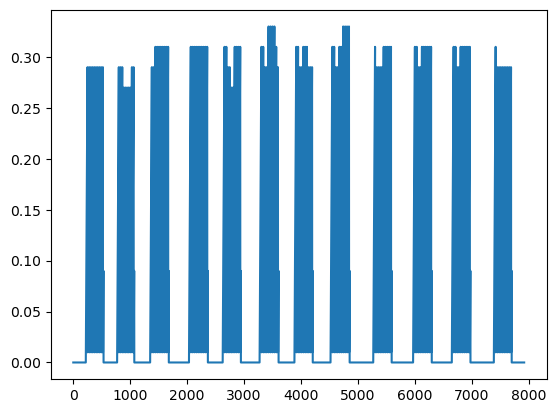

In [5]:
plt.figure()
plt.plot(L)
plt.show()

<AxesSubplot:xlabel='Time'>

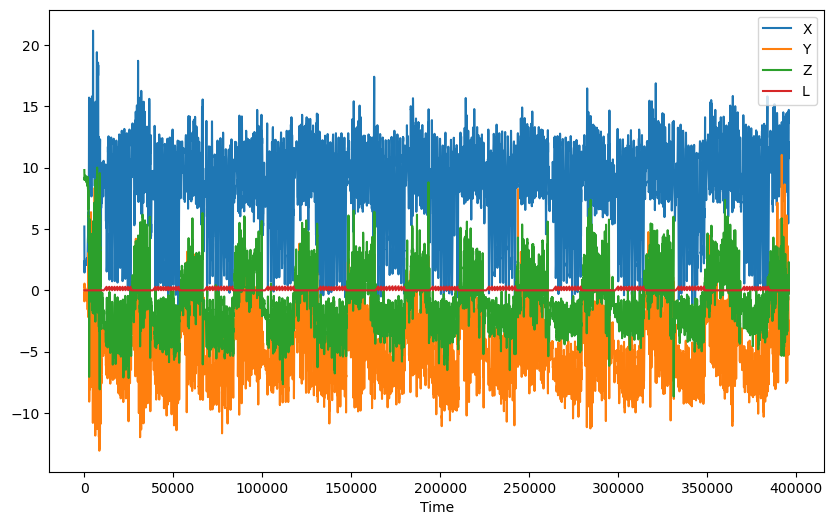

In [6]:
import pandas as pd

df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['Y']=Y
df['Z']=Z
df['L']=L

df.plot(x="Time", legend=True, figsize=(10,6))

<AxesSubplot:xlabel='Time'>

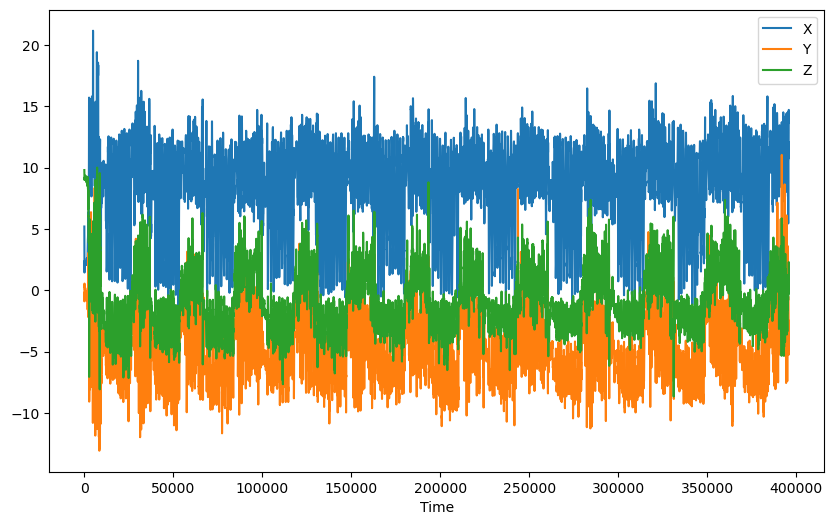

In [7]:
df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['Y']=Y
df['Z']=Z

df.plot(x="Time", legend=True, figsize=(10,6))